# Interro Méthodes statistiques
## Série 17

Vrai ou faux ? Justifiez.

1. **Faux**, L'âge est une variable quantitative car elle est mesurable et les opérations mathématiques ont un sens.
2. **Vrai**, la covariance des deux mêmes valeurs est égale à la variance de ces valeurs.
3. 9000000 * 0.00001 = 90.
4. **Vrai**, la médiane sépare la distribution en deux parties égales. Alors que la moyenne est la somme des valeurs divisée par le nombre de valeurs.
5. **Faux**, une des propriétés de la covariance explique que la covariance de deux mesures statistiques x et y est égale à la covariance de y et x.
6. **Vrai**, la distribution des résidus autour de zero d'un modèle démontre l'écart entre les valeurs prédites et les valeurs observées. Plus les résidus sont proches de zero, plus le modèle est précis/satisfaisant. 
7. **Vrai**, pour connaitre la distribution autour de la moyenne. la variance est une mesure de dispersion des valeurs autour de la moyenne. Plus la variance est grande, plus les valeurs sont dispersées. Pour l'écart-type c'est pareil, mais dans les mêmes unités que les valeurs.
8. **Vrai**, à l'inverse, la statistique descriptive est une méthode qui ne fait que résumer les données en utilisant des mesures statistiques. Alors que la statistique inférentielle permet de tirer des conclusions sur une population à partir d'un échantillon. (Si extrapoler = prédire => inférence)
9. **Faux**, le quartile 1 et le centile 100 ne sont pas équivalent. Le quartile 1 est la valeur qui sépare les 25% des valeurs les plus basses des 75% des valeurs les plus hautes. Alors que le centile 100 est la valeur qui sépare les 99% des valeurs les plus basses des 1% des valeurs les plus hautes.
10. **Faux**, La distribution gaussienne est une distribution continue et non discrète. Mais elle permet bien de donner des résultats analytiques assez simples.

#### Des données reprises dans le fichier moore.17.csv reprennent le nombre de transistors par processeur depuis 1972 jusqu'à 2018.

# A.

In [144]:
# 
# Représentez les données brutes en nuage de points. Pour ces données, un modèle linéaire vous semble-t-il opportun et pourquoi ?
#

import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv("moore.17.csv")
data

,year,n_transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4500
...,...,...
124,2018,6900000000
125,2018,10000000000
126,2018,23600000000
127,2018,6900000000


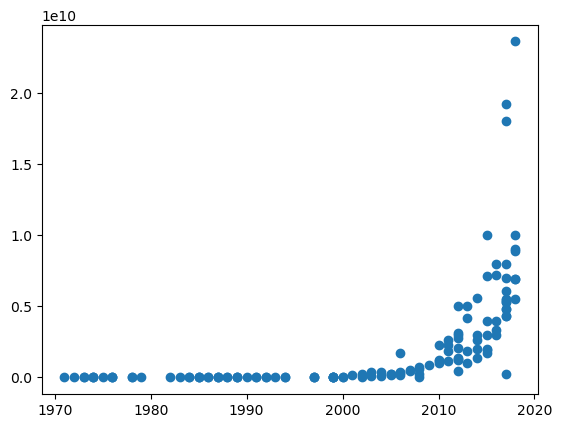

In [146]:
plt.scatter(data['year'], data['n_transistors'])
plt.show()

Un modèle linéaire ne convient pas, étant donné que la tendance de croissance est exponetielle. Nous pouvons expliquer cela avec les résidus autour de zero.

In [147]:
a = data[['year','n_transistors']].cov()['year']['n_transistors']/data[['year','n_transistors']].cov()['year']['year']
b = data['n_transistors'].mean() - a*data['year'].mean()

data['Modèle linéaire'] = data.apply(lambda r:a*r['year']+b, axis=1)

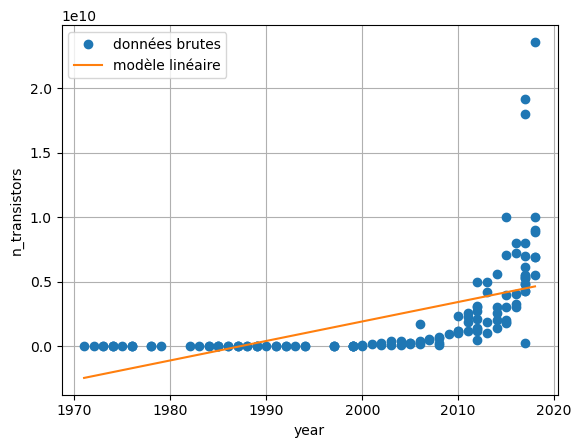

In [148]:
plt.plot(data['year'], data['n_transistors'],'o', label='données brutes')
plt.plot(data['year'], data['Modèle linéaire'], '-', label='modèle linéaire')
plt.xlabel('year')
plt.ylabel('n_transistors')
plt.grid()
plt.legend()
plt.show()

In [149]:
data['résidu'] = data.apply(lambda r:r['Modèle linéaire']-r['n_transistors'], axis=1)


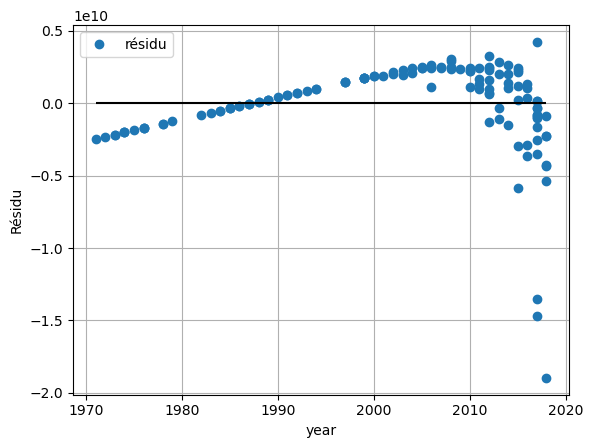

In [150]:
plt.xlabel('year')
plt.ylabel('Résidu')
plt.plot(data['year'], data['résidu'], 'o', label='résidu')
plt.hlines(0, data['year'].min(), data['year'].max(), color='black')
plt.grid()
plt.legend()
plt.show()

Ici, nous pouvons voir une distribution des résidus autour de zero qui n'est pas homogène. Cela signifie que le modèle linéaire n'est pas adapté.

# B.

In [151]:
#
# La loi de Moore (version 1975) propose une doublement du nombre de transistors par processeur tous les deux ans. Ceci indique qu'un modèle exponentiel de type " général" serait le plus adéquat. 
# Transformez les données pour ramener à un problème linéaire et donnez les paramètres du mmodèle linéaire ajusté au sens des moindre carrés. 
# En quoi ces valeurs sont-elles compatibles avec l'énoncé de la loi de Moore (version 1975) ?
# Expliquez votre démarche.
#

import numpy as np


Transfomation des données pour ramener à un problème linéaire
et 
donner les paramètres du modèle linéaire ajusté au sens des moindres carrés. (A et B)

In [152]:
data['log_n_transistors'] = data['n_transistors'].apply(lambda x:np.log(x))

aa = data[['year', 'log_n_transistors']].cov()['year']['log_n_transistors'] / data[['year', 'log_n_transistors']].cov()['year']['year']
bb = data['log_n_transistors'].mean() - aa * data['year'].mean()

aa, bb

(0.3413481236309034, -665.708556621977)

In [153]:
data['Modèle linéaire dans espace logarithmique'] = data.apply(lambda r:aa*r['year']+bb, axis=1)

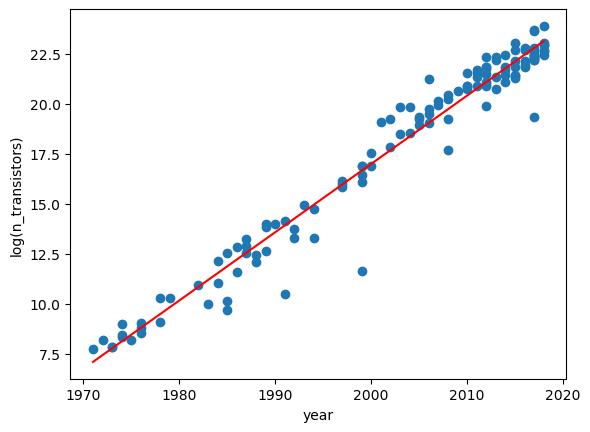

In [154]:
plt.scatter(data['year'], data['log_n_transistors'])
plt.plot(data['year'], data['Modèle linéaire dans espace logarithmique'], '-', label='modèle linéaire', color='red')
plt.xlabel('year')
plt.ylabel('log(n_transistors)')
plt.show()

In [155]:
# Afficher les paramètres du modèle linéaire
print(f'Paramètre a (pente): {aa}')
print(f'Paramètre b (ordonnée à l\'origine): {bb}')

# Afficher la pente attendue selon la loi de Moore version 1975
# La pente attend que le nombre de transistors double tous les deux ans: log(2)/2
expected_slope = np.log(2) / 2
print(f'Pente attendue selon la loi de Moore: {expected_slope}')

Paramètre a (pente): 0.3413481236309034
Paramètre b (ordonnée à l'origine): -665.708556621977
Pente attendue selon la loi de Moore: 0.34657359027997264


La pente (aa) est égale à 0.351, ce qui est très proche de la valeur attendue de 0.3466. Cela signifie que les données sont compatibles avec la loi de Moore (version 1975) qui prédit un doublement du nombre de transistors tous les deux ans.